In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np  # linear algebra
import pandas as pd # Data processing, CSV file I/O (e.g. pd.read_csv)
import os
%matplotlib inline
import matplotlib.pyplot as plt
from glob import glob
import seaborn as sns
from PIL import Image
#from imutils import paths
import random
import pickle
import cv2
import datetime
from pprint import pprint
import librosa

In [3]:
from tables import file
from pandas.core.indexes.multi import F
import pandas as pd

file1 = pd.read_csv('/content/drive/MyDrive/archive (1)/5/5.benign.csv')
file1['label'] = 'benign'
file2 = pd.read_csv('/content/drive/MyDrive/archive (1)/5/5.gafgyt.combo.csv')
file2['label'] = 'gafgyt combo'
file3 = pd.read_csv('/content/drive/MyDrive/archive (1)/5/5.gafgyt.junk.csv')
file3['label'] = 'gafgyt junk'
file4 = pd.read_csv('/content/drive/MyDrive/archive (1)/5/5.gafgyt.scan.csv')
file4['label'] = 'gafgyt scan'
file5 = pd.read_csv('/content/drive/MyDrive/archive (1)/5/5.gafgyt.tcp.csv')
file5['label'] = 'gafgyt tcp'
file6 = pd.read_csv('/content/drive/MyDrive/archive (1)/5/5.gafgyt.udp.csv')
file6['label'] = 'gafgyt udp'
file7 = pd.read_csv('/content/drive/MyDrive/archive (1)/5/5.mirai.ack.csv')
file7['label'] = 'mirai ack'
file8 = pd.read_csv('/content/drive/MyDrive/archive (1)/5/5.mirai.scan.csv')
file8['label'] = 'mirai scan'
file9 = pd.read_csv('/content/drive/MyDrive/archive (1)/5/5.mirai.syn.csv')
file9['label'] = 'mirai syn'
file10 = pd.read_csv('/content/drive/MyDrive/archive (1)/5/5.mirai.udp.csv')
file10['label'] = 'mirai udp'
file11 = pd.read_csv('/content/drive/MyDrive/archive (1)/5/5.mirai.udpplain.csv')
file11['label'] = 'mirai udpplain'

file12 = pd.read_csv('/content/drive/MyDrive/archive (1)/6/6.benign.csv')
file12['label'] = 'benign'
file13 = pd.read_csv('/content/drive/MyDrive/archive (1)/6/6.gafgyt.combo.csv')
file13['label'] = 'gafgyt combo'
file14 = pd.read_csv('/content/drive/MyDrive/archive (1)/6/6.gafgyt.junk.csv')
file14['label'] = 'gafgyt junk'
file15 = pd.read_csv('/content/drive/MyDrive/archive (1)/6/6.gafgyt.scan.csv')
file15['label'] = 'gafgyt scan'
file16 = pd.read_csv('/content/drive/MyDrive/archive (1)/6/6.gafgyt.tcp.csv')
file16['label'] = 'gafgyt tcp'
file17 = pd.read_csv('/content/drive/MyDrive/archive (1)/6/6.gafgyt.udp.csv')
file17['label'] = 'gafgyt udp'
file18 = pd.read_csv('/content/drive/MyDrive/archive (1)/6/6.mirai.ack.csv')
file18['label'] = 'mirai ack'
file19 = pd.read_csv('/content/drive/MyDrive/archive (1)/6/6.mirai.scan.csv')
file19['label'] = 'mirai scan'
file20 = pd.read_csv('/content/drive/MyDrive/archive (1)/6/6.mirai.syn.csv')
file20['label'] = 'mirai syn'
file21 = pd.read_csv('/content/drive/MyDrive/archive (1)/6/6.mirai.udp.csv')
file21['label'] = 'mirai udp'
file22 = pd.read_csv('/content/drive/MyDrive/archive (1)/6/6.mirai.udpplain.csv')
file22['label'] = 'mirai udpplain'

file0 = pd.concat([file1, file2])
del file1,file2
file0 = pd.concat([file0,file3])
del file3
file0 = pd.concat([file0,file4])
del file4
file0 = pd.concat([file0,file5])
del file5
file0 = pd.concat([file0,file6])
del file6
file0 = pd.concat([file0,file7])
del file7
file0 = pd.concat([file0,file8])
del file8
file0 = pd.concat([file0,file9])
del file9
file0 = pd.concat([file0,file10])
del file10
file0 = pd.concat([file0,file11])
del file11

file0 = pd.concat([file0,file12])
del file12
file0 = pd.concat([file0,file13])
del file13
file0 = pd.concat([file0,file14])
del file14
file0 = pd.concat([file0,file15])
del file15
file0 = pd.concat([file0,file16])
del file16
file0 = pd.concat([file0,file17])
del file17
file0 = pd.concat([file0,file18])
del file18
file0 = pd.concat([file0,file19])
del file19
file0 = pd.concat([file0,file20])
del file20
file0 = pd.concat([file0,file21])
del file21
file0 = pd.concat([file0,file22])
del file22


In [4]:
file0['label'].value_counts()

mirai udp         314856
gafgyt udp        208669
gafgyt tcp        193897
mirai scan        193877
benign            160668
mirai syn         127597
gafgyt combo      118910
mirai ack         118551
mirai udpplain    110466
gafgyt junk        59966
gafgyt scan        57694
Name: label, dtype: int64

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
file0.label = le.fit_transform(file0.label)

file0

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,label
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.0,0.0,0
1,1.000000,590.000000,0.000000,1.000000,590.000000,0.000000e+00,1.000000,590.000000,0.000000,1.000000,...,0.0,0.0,6.302352,416.121686,113.526005,416.121686,1.288815e+04,0.0,0.0,0
2,1.942585,590.000000,0.000000,1.965145,590.000000,1.160000e-10,1.988244,590.000000,0.000000,1.998818,...,0.0,0.0,7.301607,439.935392,121.229684,439.935392,1.469664e+04,0.0,0.0,0
3,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.0,0.0,0
4,1.979600,66.061831,35.996177,1.987709,66.037100,3.599862e+01,1.995886,66.012367,35.999847,1.999588,...,0.0,0.0,1.000000,72.000000,0.000000,72.000000,0.000000e+00,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53780,175.922167,245.258296,57196.959307,245.165360,280.596349,6.031172e+04,518.098108,308.772943,61001.231629,3432.954056,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.0,0.0,10
53781,176.921585,244.211175,57066.560798,246.164874,279.700216,6.026360e+04,519.097765,308.293702,61002.710201,3433.953829,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.0,0.0,10
53782,176.517481,245.966179,57283.870010,245.990822,280.815298,6.032324e+04,519.271193,308.766877,61001.270900,3434.406639,...,0.0,0.0,13201.854171,554.000000,0.000048,554.000000,2.328306e-09,0.0,0.0,10
53783,177.516314,247.701421,57492.675898,246.989846,281.921354,6.037994e+04,520.270506,309.238234,60999.391919,3435.406185,...,0.0,0.0,13202.853996,554.000000,0.000049,554.000000,2.444722e-09,0.0,0.0,10


In [6]:
import numpy as np

# assume your DataFrame is named 'df'
file0 = file0.replace([np.inf, -np.inf], np.nan)  # replace infinite values with NaN
#da = da[da.abs() < np.finfo(np.float64).max]  # remove all rows containing values larger than max float

file0 = file0.dropna()

# print the new DataFrame shape to verify the infinite or too large values have been removed
print(file0.shape)

(1665151, 116)


In [7]:
data = file0.iloc[:,:-1]

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(file0.iloc[:,:-1])

In [9]:
X = pd.DataFrame(scaled_features, columns = data.columns)
y = file0.iloc[:,-1]

print(X.shape)
print(y.shape)

(1665151, 115)
(1665151,)


In [10]:
X= X.values

In [11]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=100)
Xrus,Yrus = rus.fit_resample(X,y)

In [12]:
labels_full = pd.get_dummies(Yrus,prefix='type')
labels_full.head()

labels = labels_full.values
labels

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xrus,labels, test_size=0.2, random_state=100)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.125, random_state=100)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_validate.shape)
print(y_test.shape)


(444243, 115)
(444243, 11)
(126927, 115)
(63464, 11)
(126927, 11)


In [14]:
import numpy as np
X_train_cnn = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_test_cnn = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
x_validate_cnn = np.reshape(X_validate, (X_validate.shape[0], X_validate.shape[1],1)) 

In [15]:
import keras
from keras.utils import np_utils
from keras.regularizers import *
from keras.initializers import glorot_uniform

import keras.backend as K
K.clear_session()

from keras.models import *
from keras.layers import *
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import *
from keras.callbacks import *

In [16]:
# Build Model CNN_LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=5, padding='same', activation = 'relu', input_shape = (X_train_cnn.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=5, padding='same', activation = 'relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, activation = 'relu', return_sequences=True))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(16, return_sequences=True))  # returns a sequence of vectors of dimension 16
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(y_train.shape[1],activation='softmax'))

modelName = 'CNN+LSTM'
#keras.utils.plot_model(model, './'+modelName+'_Archi.png',show_shapes=True)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 115, 64)           384       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 57, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 57, 32)            10272     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 28, 32)           0         
 1D)                                                             
                                                                 
 lstm (LSTM)                 (None, 28, 32)            8320      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 14, 32)           0

In [17]:
adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
#sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True) 

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            learning_rate=0.00001)
earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 10,
                          verbose = 1,
                          restore_best_weights = True)

checkpoint = ModelCheckpoint('./'+modelName+'.h5',
                            monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             save_weights_only=True,
                             verbose=1)

In [18]:
epochs = 100
batch_size = 512
history = model.fit(X_train_cnn,y_train, batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_validate_cnn,y_validate),
    callbacks=[learning_rate_reduction, checkpoint] 
)


Epoch 1/100
868/868 [==============================] - ETA: 0s - loss: 0.4730 - accuracy: 0.7701
Epoch 1: val_loss improved from inf to 0.27205, saving model to ./CNN+LSTM.h5
868/868 [==============================] - 240s 270ms/step - loss: 0.4730 - accuracy: 0.7701 - val_loss: 0.2720 - val_accuracy: 0.8486 - lr: 0.0010
Epoch 2/100
868/868 [==============================] - ETA: 0s - loss: 0.2404 - accuracy: 0.8612
Epoch 2: val_loss improved from 0.27205 to 0.20645, saving model to ./CNN+LSTM.h5
868/868 [==============================] - 225s 259ms/step - loss: 0.2404 - accuracy: 0.8612 - val_loss: 0.2064 - val_accuracy: 0.8697 - lr: 0.0010
Epoch 3/100
868/868 [==============================] - ETA: 0s - loss: 0.1899 - accuracy: 0.8859
Epoch 3: val_loss improved from 0.20645 to 0.15597, saving model to ./CNN+LSTM.h5
868/868 [==============================] - 225s 259ms/step - loss: 0.1899 - accuracy: 0.8859 - val_loss: 0.1560 - val_accuracy: 0.9003 - lr: 0.0010
Epoch 4/100
868/868 [==

3967/3967 [==============================] - 46s 11ms/step


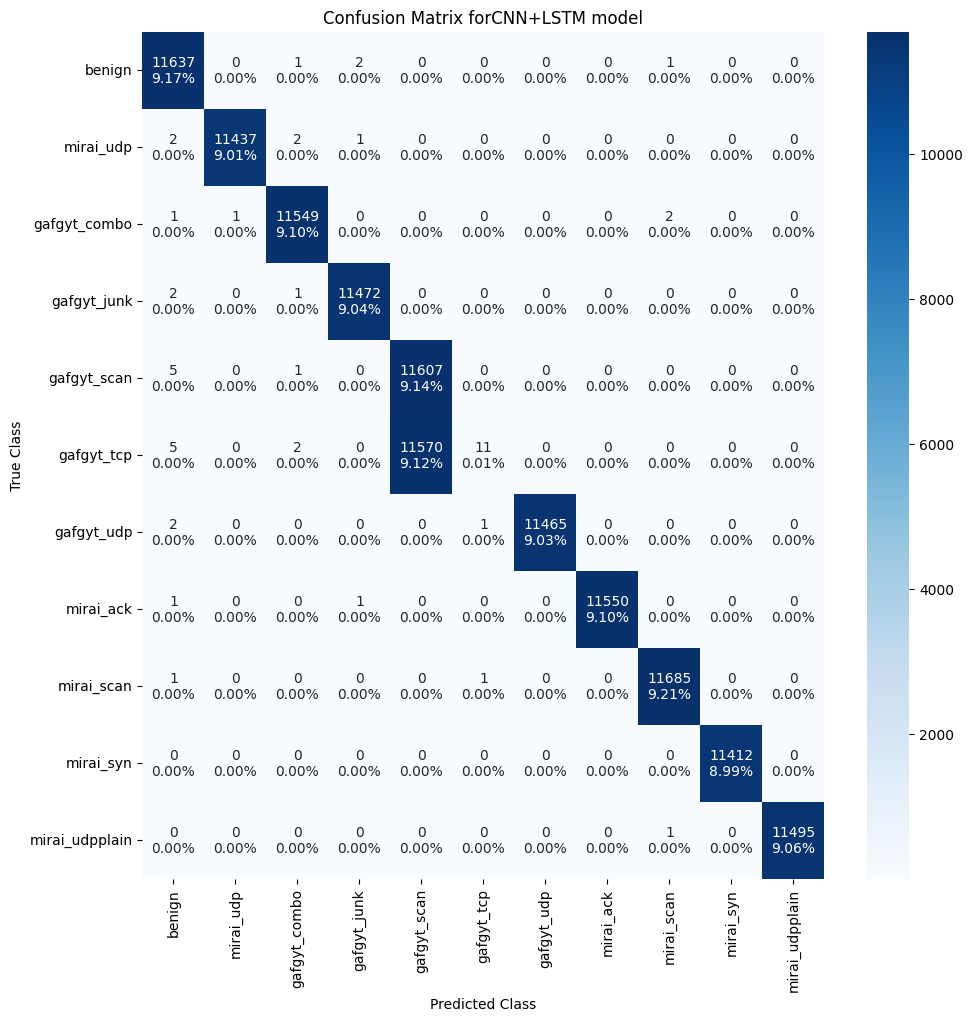

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support,  roc_curve, auc
import tensorflow as tf 
#model = tf.keras.models.load_model('/'+model_name+'.h5')

y_pred = model.predict(X_test_cnn)

y_pred_cm  = np.argmax(y_pred, axis =1)
y_test_cm  = np.argmax(y_test, axis = 1)

cm = confusion_matrix(y_test_cm, y_pred_cm) 

group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(11,11)

label = ['benign','mirai_udp','gafgyt_combo','gafgyt_junk','gafgyt_scan','gafgyt_tcp','gafgyt_udp'\
        ,'mirai_ack','mirai_scan','mirai_syn','mirai_udpplain']

plt.figure(figsize=(11,11))
sns.heatmap(cm, xticklabels=label, yticklabels=label, annot=labels, fmt='', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix for'+ modelName+' model')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.savefig('./'+modelName+'_CM.png')
plt.show()

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test_cm, y_pred_cm, target_names= ['benign','mirai_udp','gafgyt_combo','gafgyt_junk','gafgyt_scan','gafgyt_tcp','gafgyt_udp','mirai_ack','mirai_scan','mirai_syn','mirai_udpplain']))

loss, accuracy = model.evaluate(X_test_cnn, y_test, verbose=1)
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

with open('./'+modelName+'_CR.txt','a') as f:
    f.write(classification_report(y_test_cm, y_pred_cm, target_names= ['benign','mirai_udp','gafgyt_combo','gafgyt_junk','gafgyt_scan','gafgyt_tcp','gafgyt_udp','mirai_ack','mirai_scan','mirai_syn','mirai_udpplain']))
    f.write("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

                precision    recall  f1-score   support

        benign       1.00      1.00      1.00     11641
     mirai_udp       1.00      1.00      1.00     11442
  gafgyt_combo       1.00      1.00      1.00     11553
   gafgyt_junk       1.00      1.00      1.00     11475
   gafgyt_scan       0.50      1.00      0.67     11613
    gafgyt_tcp       0.85      0.00      0.00     11588
    gafgyt_udp       1.00      1.00      1.00     11468
     mirai_ack       1.00      1.00      1.00     11552
    mirai_scan       1.00      1.00      1.00     11687
     mirai_syn       1.00      1.00      1.00     11412
mirai_udpplain       1.00      1.00      1.00     11496

      accuracy                           0.91    126927
     macro avg       0.94      0.91      0.88    126927
  weighted avg       0.94      0.91      0.88    126927

3967/3967 [==============================] - 49s 12ms/step - loss: 0.1278 - accuracy: 0.9086
Test: accuracy = 0.908554  ;  loss = 0.127806


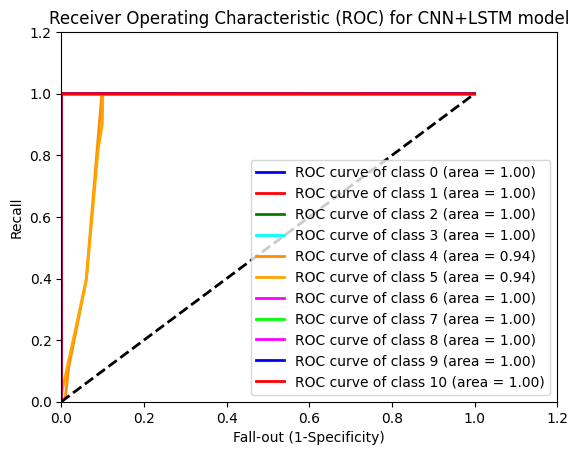

In [21]:
from itertools import cycle
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(labels.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green','aqua', 'darkorange', 'orange','fuchsia', 'lime','magenta'])
for i, color in zip(range(labels.shape[1]), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0,1.2])
plt.ylim([0.0,1.2])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.title('Receiver Operating Characteristic (ROC) for '+modelName+' model')
plt.legend(loc="lower right")
plt.savefig('./'+modelName+'_ROC.png')

plt.show()

In [22]:
from sklearn.metrics import precision_score
macro_score_rf = precision_score(y_test_cm,y_pred_cm,average='macro')
micro_score_rf = precision_score(y_test_cm,y_pred_cm,average='micro')
weighted_score_rf = precision_score(y_test_cm,y_pred_cm,average='weighted')

#precision scores
print(macro_score_rf)
print(micro_score_rf)
print(weighted_score_rf)

from sklearn.metrics import recall_score
rmacro_score_rf = recall_score(y_test_cm,y_pred_cm,average='macro')
rmicro_score_rf = recall_score(y_test_cm,y_pred_cm,average='micro')
rweighted_score_rf = recall_score(y_test_cm,y_pred_cm,average='weighted')

#precision scores
print(rmacro_score_rf)
print(rmicro_score_rf)
print(rweighted_score_rf)

0.9403580054656442
0.9085537356118084
0.9400050995979315
0.9089410438871071
0.9085537356118084
0.9085537356118084
